In [2]:
%pip install numpy matplotlib scikit-learn gensim

53.06s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.


### Visualizing Word Embeddings using PCA and t-SNE
- Model from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM
- Reference: https://github.com/practical-nlp/practical-nlp-code/blob/835096fb83b396d1fac70fb313c294b409b02d7a/Ch3/05_Pre_Trained_Word_Embeddings.ipynb

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

# Load pre-trained word embeddings
# For this example, we're assuming Word2Vec embeddings, but adjust accordingly for others.
model = KeyedVectors.load_word2vec_format(r'/media/bigboy/GoogleNews-vectors-negative300.bin', binary=True)

In [4]:
model.most_similar('beautiful')

[('gorgeous', 0.8353005051612854),
 ('lovely', 0.8106935620307922),
 ('stunningly_beautiful', 0.7329413890838623),
 ('breathtakingly_beautiful', 0.7231340408325195),
 ('wonderful', 0.6854085922241211),
 ('fabulous', 0.670006513595581),
 ('loveliest', 0.6612577438354492),
 ('prettiest', 0.6595001220703125),
 ('beatiful', 0.6593325138092041),
 ('magnificent', 0.6591402888298035)]

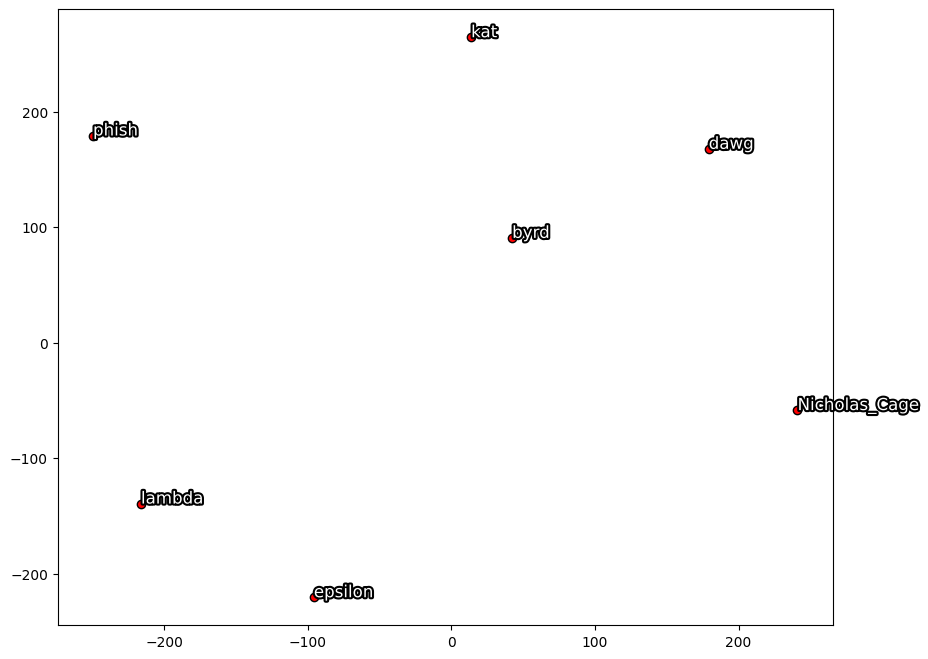

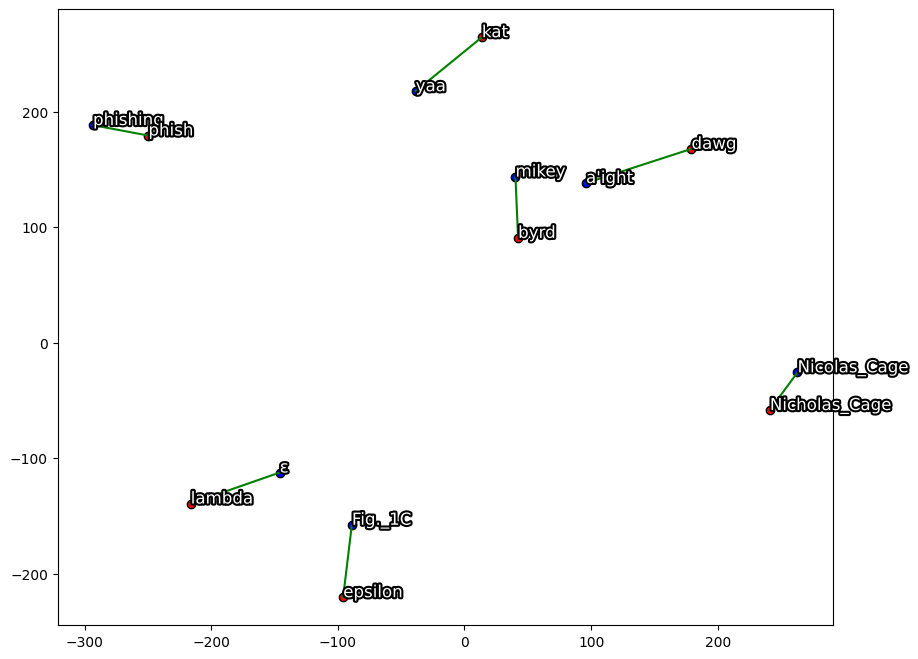

In [5]:
import matplotlib.patheffects as PathEffects

def similiarTupleToArr(original,similiar):
  return [original] + [word for word, _ in similiar]
def plot_words(words_to_visualize):
  words = []
  for vword in words_to_visualize:
    if model.key_to_index[vword]:
      similar = model.most_similar(vword, topn=3)
      new_words = similiarTupleToArr(vword,similar)
      words.extend(new_words)
  # Extracting the vectors for the words
  word_vectors = np.array([model[word] for word in words])
  plot_vec(word_vectors, words)

def plot_vec(word_vectors, words):
  # Using t-SNE to reduce dimensionality for visualization
  perplexity = max(1, len(words) / 2)
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
  word_vectors_2d = tsne.fit_transform(word_vectors)

  # Plotting the words in 2D space
  plt.figure(figsize=(10, 8))
  plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
  for word, (x, y) in zip(words, word_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word)

  plt.show()
def plot_words_similiar(words_to_visualize, similar_words_count=3, display_similar_count=3):
  words = []
  similiar_words = []
  for vword in words_to_visualize:
    words.append(vword)
    if model.key_to_index[vword] and similar_words_count != 0:
      similar = model.most_similar(vword, topn=similar_words_count)
      #new_words = similiarTupleToArr(vword,similar)
      new_words = [word for word, _ in similar]
      similiar_words.extend(new_words)
  # Extracting the vectors for the words
  word_vectors = np.array([model[word] for word in words])
  similiar_words_vectors = np.array([model[word] for word in similiar_words])
  plot_vec_similiar(word_vectors, words, similiar_words_vectors, similiar_words, similar_words_count, display_similar_count)

def plot_vec_similiar(word_vectors, words, similiar_words_vectors, similiar_words, similar_words_count, display_similar_count, display_plot=True):
  
  # Concatenate the vectors
  if similar_words_count == 0:
    all_vectors = word_vectors
  else:
    all_vectors = np.concatenate((word_vectors, similiar_words_vectors), axis=0)


  # Using t-SNE to reduce dimensionality for visualization
  perplexity = 5#max(1, (len(words) + len(similiar_words)) / 2) # default 30
  learning_rate = 200  # Default is 200
  early_exaggeration = 45.0  # Default is 12.0
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, early_exaggeration=early_exaggeration, learning_rate=learning_rate)
  all_vectors_2d = tsne.fit_transform(all_vectors)

  # Split the transformed vectors back into two arrays
  word_vectors_2d = all_vectors_2d[:len(word_vectors)]
  similiar_words_vectors_2d = all_vectors_2d[len(word_vectors):]

  # Slice the arrays to only include the first display_similar_count elements for each word
  display_similiar_words_vectors_2d = np.array([similiar_words_vectors_2d[i * similar_words_count : i * similar_words_count + display_similar_count] for i in range(len(words))]).reshape(-1, 2)
  display_similiar_words = [similiar_words[i * similar_words_count : i * similar_words_count + display_similar_count] for i in range(len(words))]


  # Plotting the words in 2D space
  if display_plot:
    plt.figure(figsize=(10, 8))
  plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
  #plt.scatter(similiar_words_vectors_2d[:, 0], similiar_words_vectors_2d[:, 1], edgecolors='k', c='b')
  plt.scatter(display_similiar_words_vectors_2d[:, 0], display_similiar_words_vectors_2d[:, 1], edgecolors='k', c='b')
  for i, word in enumerate(words):
    word_x, word_y = word_vectors_2d[i]
    for j in range(min(similar_words_count, display_similar_count)):
        similar_word_index = i * similar_words_count + j
        similar_word_x, similar_word_y = similiar_words_vectors_2d[similar_word_index]
        plt.plot([word_x, similar_word_x], [word_y, similar_word_y], 'g-')

  
  for i, word in enumerate(words):
    for j in range(min(similar_words_count, display_similar_count)):
        similar_word_index = i * similar_words_count + j
        similar_word_x, similar_word_y = similiar_words_vectors_2d[similar_word_index]
        plt.text(similar_word_x + 0.05, similar_word_y + 0.05, similiar_words[similar_word_index], fontsize=12, color='white', 
                 path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])
  for word, (x, y) in zip(words, word_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word, fontsize=12, color='white', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])

  if display_plot:
    plt.show()

words_to_visualize = ['dawg', 'kat', 'byrd', 'phish', 'Nicholas_Cage', 'lambda', 'epsilon']
plot_words_similiar(words_to_visualize, 2,0)
plot_words_similiar(words_to_visualize, 2,1)
#plot_words_similiar(words_to_visualize, 2, 2)
#plot_words_similiar(words_to_visualize, 3, 3)

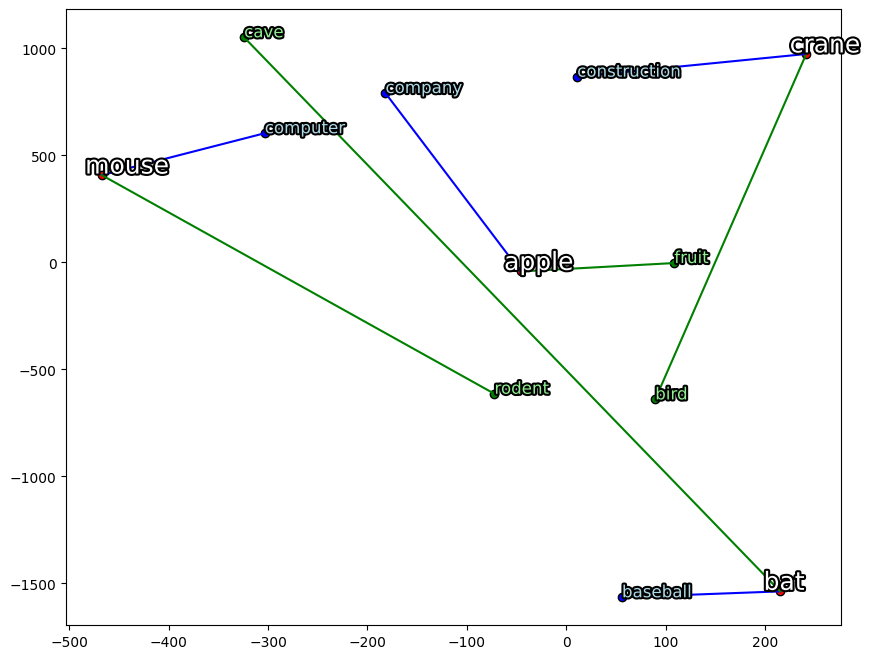

In [21]:
def plot_vec_similiar_polysemy(word_vectors, words, similiar_words1_vectors, similiar_words1, similiar_words2_vectors, similiar_words2):
  
  all_vectors = np.concatenate((word_vectors, similiar_words1_vectors, similiar_words2_vectors), axis=0)

  # Using t-SNE to reduce dimensionality for visualization
  perplexity = 2#max(1, (len(words) + len(similiar_words)) / 2) # default 30
  learning_rate = 200  # Default is 200
  early_exaggeration = 45.0  # Default is 12.0
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, early_exaggeration=early_exaggeration, learning_rate=learning_rate)
  all_vectors_2d = tsne.fit_transform(all_vectors)

  # Split the transformed vectors back into three arrays
  word_vectors_2d = all_vectors_2d[:len(word_vectors)]
  similiar_words1_vectors_2d = all_vectors_2d[len(word_vectors):len(word_vectors)+len(similiar_words1)]
  similiar_words2_vectors_2d = all_vectors_2d[len(word_vectors)+len(similiar_words1):]


  # Plotting the words in 2D space
  plt.figure(figsize=(10, 8))
  plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
  plt.scatter(similiar_words1_vectors_2d[:, 0], similiar_words1_vectors_2d[:, 1], edgecolors='k', c='b')
  plt.scatter(similiar_words2_vectors_2d[:, 0], similiar_words2_vectors_2d[:, 1], edgecolors='k', c='g')
  
  for i, word in enumerate(words):
    word_x, word_y = word_vectors_2d[i]
    similar_word_index = i 
    similar_word_x, similar_word_y = similiar_words1_vectors_2d[similar_word_index]
    plt.plot([word_x, similar_word_x], [word_y, similar_word_y], 'b-')
  
  for i, word in enumerate(words):
    word_x, word_y = word_vectors_2d[i]
    similar_word_index = i 
    similar_word_x, similar_word_y = similiar_words2_vectors_2d[similar_word_index]
    plt.plot([word_x, similar_word_x], [word_y, similar_word_y], 'g-')

  for word, (x, y) in zip(words, word_vectors_2d):
    plt.text(x - 16.65, y + 7.15, word, fontsize=18, color='white', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])

  for word, (x, y) in zip(similiar_words1, similiar_words1_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word, fontsize=12, color='lightblue', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])

  for word, (x, y) in zip(similiar_words2, similiar_words2_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word, fontsize=12, color='lightgreen', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])

  plt.show()

words_to_visualize = ['bat', 'crane', 'mouse', 'apple']

# similiar words to first meaning
similiar1 = ['baseball', 'construction', 'computer', 'company']
similiar2 = ['cave', 'bird', 'rodent', 'fruit']

word_vectors = np.array([model[word] for word in words_to_visualize])
similiar1_words_vectors = np.array([model[word] for word in similiar1])
similiar2_words_vectors = np.array([model[word] for word in similiar2])

plot_vec_similiar_polysemy(word_vectors, words_to_visualize, similiar1_words_vectors, similiar1, similiar2_words_vectors, similiar2)


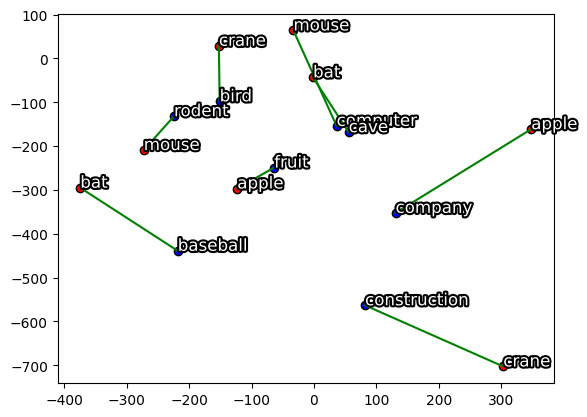

In [7]:


# Examples of polysemous words and how word2vec cant distinguish between them

# Polysemous words
words_to_visualize = ['bat', 'crane', 'mouse', 'apple']

# similiar words to first meaning
similiar1 = ['baseball', 'construction', 'computer', 'company']
# similiar words to second meaning
similiar2 = ['cave', 'bird', 'rodent', 'fruit', 'after']

word_vectors = np.array([model[word] for word in words_to_visualize])
similiar1_words_vectors = np.array([model[word] for word in similiar1])
similiar2_words_vectors = np.array([model[word] for word in similiar2])
plot_vec_similiar(word_vectors, words_to_visualize, similiar1_words_vectors, similiar1, 1, 1, False)
plot_vec_similiar(word_vectors, words_to_visualize, similiar2_words_vectors, similiar2, 1, 1, False)

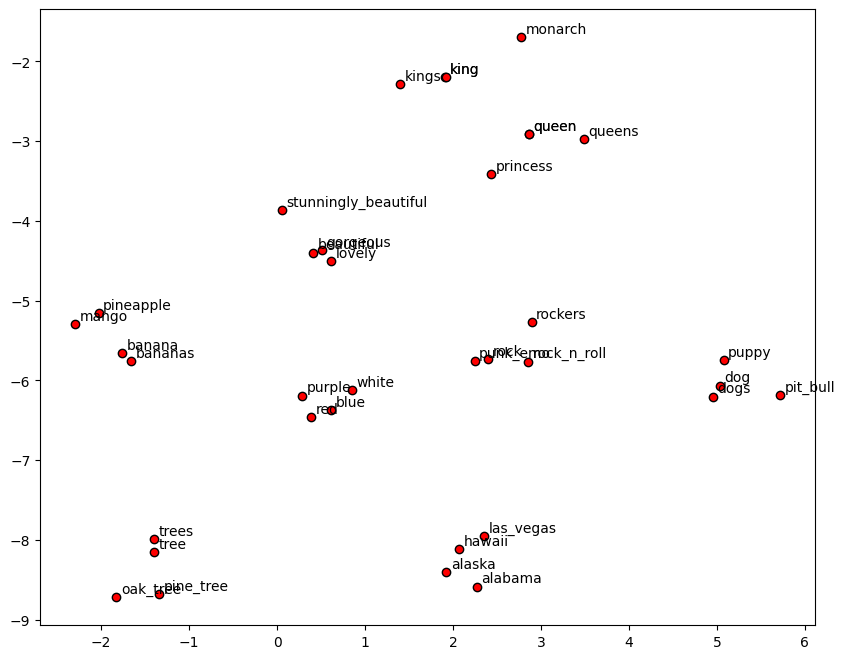

In [8]:
words_to_visualize = ['king', 'queen', 'beautiful', 'dog', 'banana', 'rock', 'tree', 'blue', 'hawaii']
plot_words(words_to_visualize)

/home/lettuce/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 57453 (\ue06d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


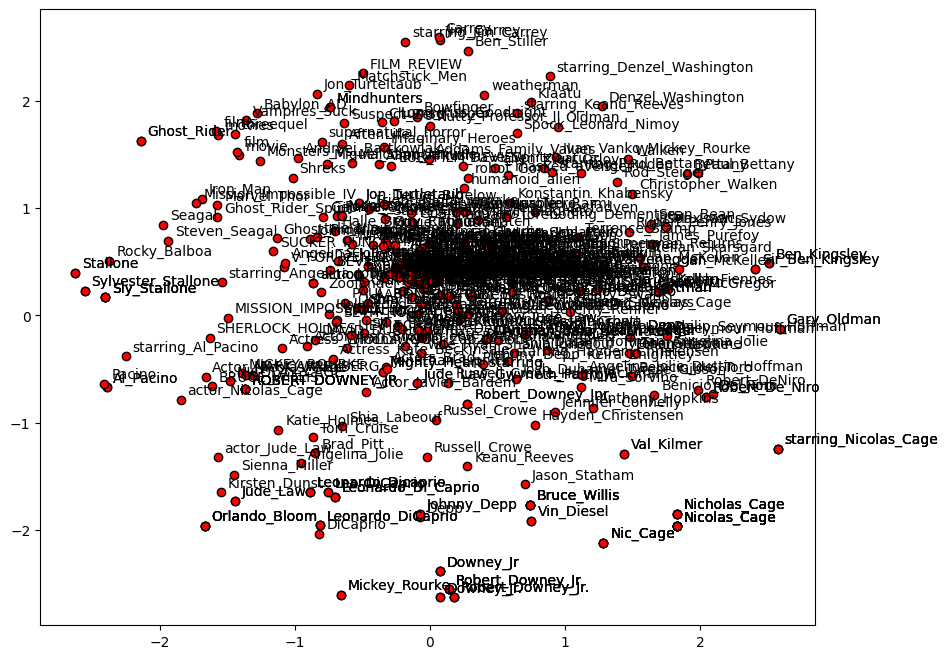

In [9]:
# Nick Cage
Nick_OSphere = model.most_similar('Nicholas_Cage', topn=100)
words_to_visualize = similiarTupleToArr('Nicholas_Cage',Nick_OSphere)
plot_words(words_to_visualize)

<BarContainer object of 100 artists>

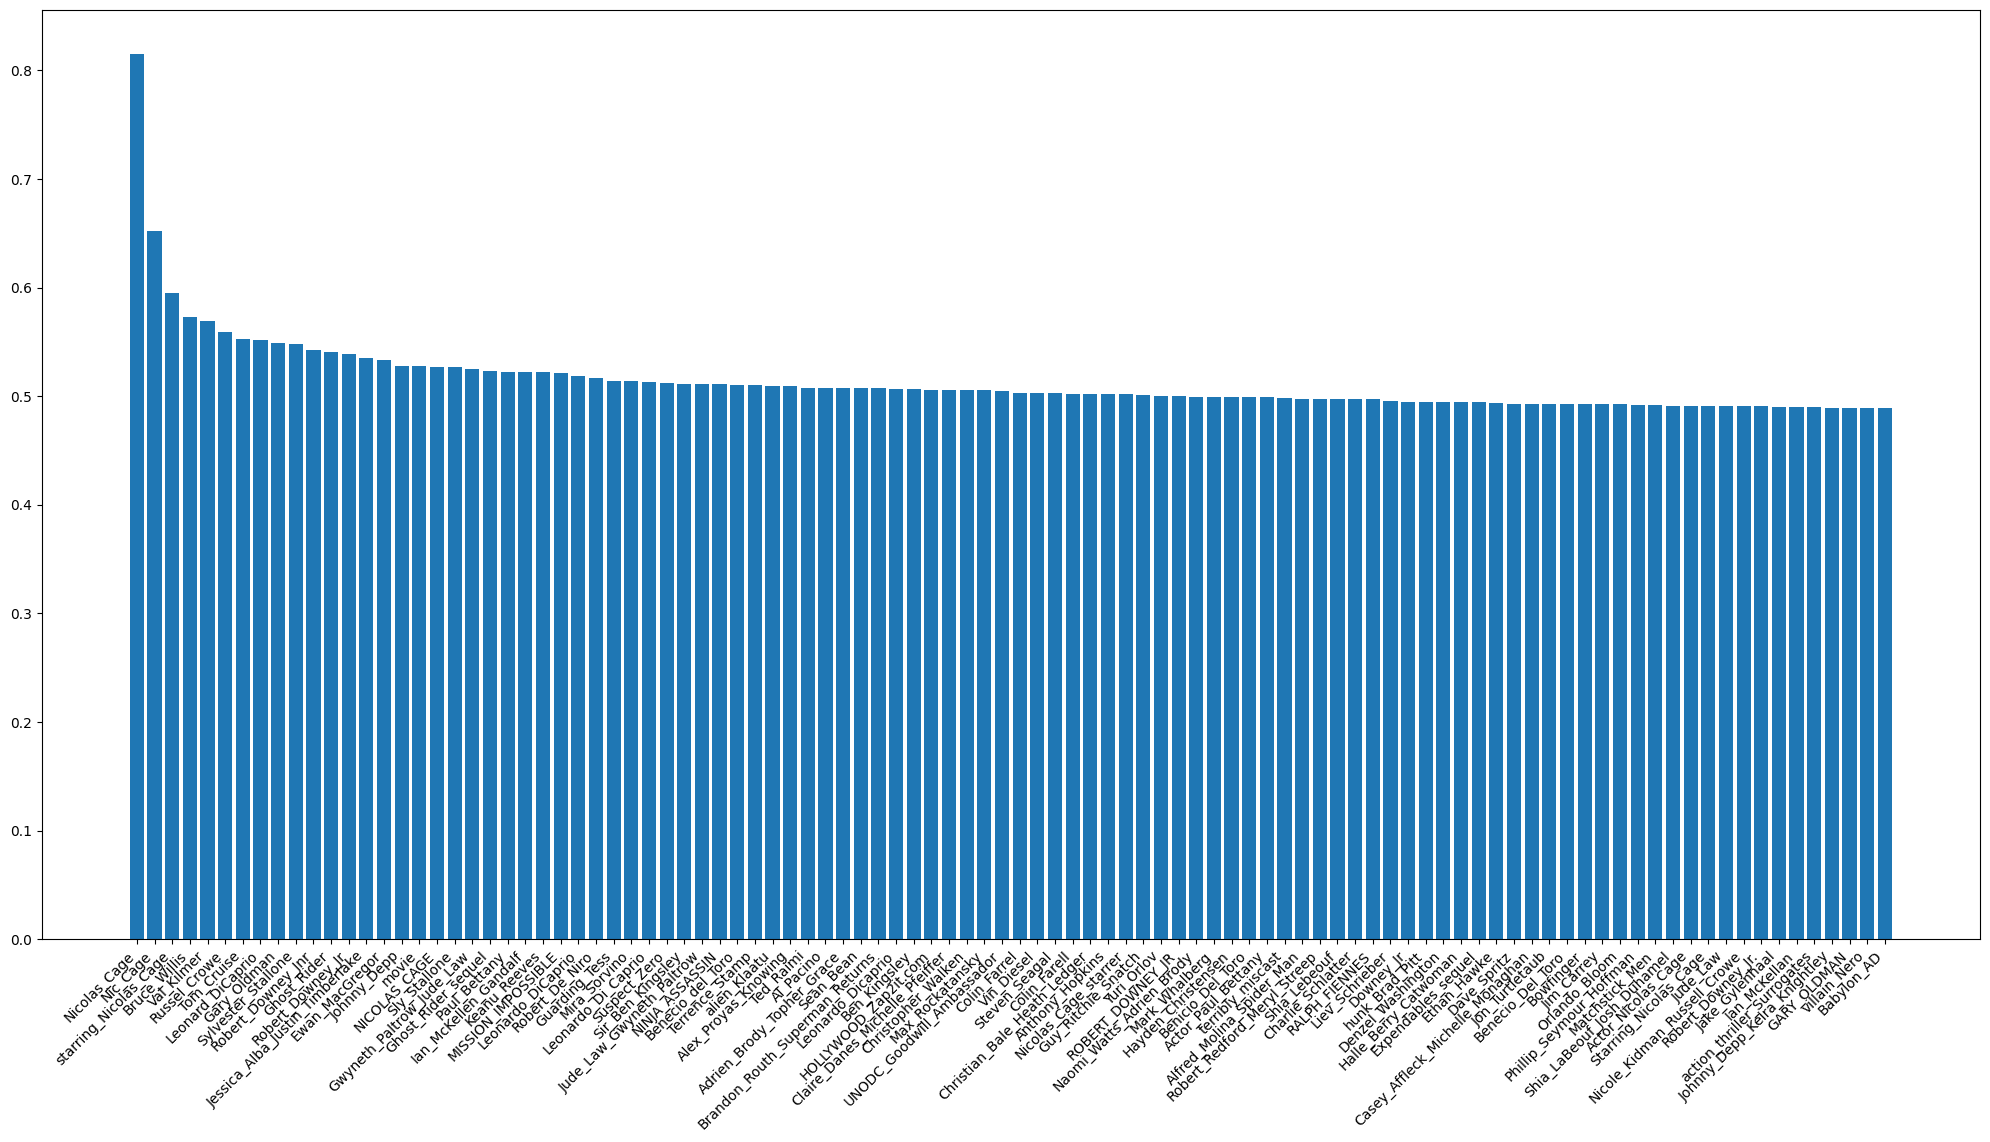

In [10]:
# display a bar chart of the most similar words
similar_words = Nick_OSphere#model.most_similar('beautiful', topn=10)
words = [word for word, _ in similar_words]
scores = [score for _, score in similar_words]
# increase spacing on labels for readability
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.bar(words, scores)

In [11]:
# user input to test if words are in the model vocabulary
word = input('Enter a word: ')
if word in model.key_to_index:
  words = model.most_similar(word, topn=10)
  
  print(words)
  plot_words([word, "taxes"] + [word for word, _ in words], 0)
else:
  print('Word not in vocabulary')

[('fark', 0.629880428314209), ('kitna', 0.6183310151100159), ('SAYANTI', 0.6180046200752258), ('guna', 0.6171829700469971), ('kintu', 0.6136816740036011), ('modi', 0.6101470589637756), ('kan_du', 0.6094650030136108), ('tortor', 0.6086887717247009), ('kiran', 0.6086224913597107), ('eget', 0.6081479787826538)]


TypeError: plot_words() takes 1 positional argument but 2 were given